In [1]:
import sys
sys.argv.append('--task')
sys.argv.append('quadrotor')
sys.argv.append('--algo')
sys.argv.append('gp_mpc')
sys.argv.append('--overrides')
sys.argv.append('./config_overrides/gp_mpc_quad.yaml')
sys.argv.append('--image_dir')
sys.argv.append('./media/media_gp_mpc_multi/')
# %%python3.11 - --task quadrotor --algo foresee_cbf_qp_cov --overrides ./config_overrides/gp_mpc_quad.yaml --image_dir ./media/media_foresee_cbf_qp_cov/

"""This script runs the GP-MPC experiment in our Annual Reviews article.

See Figure 6 in https://arxiv.org/pdf/2108.06266.pdf.

"""

# quad config: https://github.com/utiasDSL/safe-control-gym/blob/83fae93172782f7c6e98063da0b2425d3f741f1b/safe_control_gym/envs/gym_pybullet_drones/quadrotor.yaml#L17
# quad model: https://github.com/utiasDSL/safe-control-gym/blob/83fae93172782f7c6e98063da0b2425d3f741f1b/safe_control_gym/envs/gym_pybullet_drones/quadrotor.py
import os
# import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import munch
import numpy as np
from functools import partial
import time

from safe_control_gym.utils.registration import make
from safe_control_gym.utils.configuration import ConfigFactory

import jax.numpy as jnp

import pdb

if __name__ == "__main__":
    fac = ConfigFactory()
    fac.add_argument("--train_only", type=bool, default=False, help="True if only training is performed.")
    
    config = fac.merge()
    # Create environment.
    env_func = partial(make,
                       config.task,
                       seed=config.seed,
                       **config.task_config
                       )
    # print(f"env_func: {env_func}")
    # exit()
    # Create GP controller.
    ctrl = make(config.algo,
                env_func,
                **config.algo_config
                )
    ctrl.reset()
    # Initial state for comparison.
    init_state = {'init_x': -1.0,
                  'init_x_dot': 0.0,
                  'init_z': 0.0,
                  'init_z_dot': 0.0,
                  'init_theta': 0.0,
                  'init_theta_dot': 0.0
                  }
    # Run the prior controller.
    test_env = env_func(init_state=init_state,
                        randomized_init=False)
    prior_results = ctrl.prior_ctrl.run(env=test_env,
                                        max_steps=30)
    
    # Learn the gp by collecting training points.
    ctrl.learn()
    # input("Press any key to continue.. ")
    print("Press any key to continue.. ")
    if not config.train_only:
        # Run with the learned gp model.
        steps = 30
        t0 = time.time()
        run_results = ctrl.run(env=test_env,
                               max_steps=steps)  #50)
        print(f"time: {time.time()-t0}")
        ctrl.close()
        # Plot the results.
        prior_run = munch.munchify(prior_results)
        run = munch.munchify(run_results)

file_pathg: ./config_overrides/gp_mpc_quad.yaml


pybullet build time: Nov 28 2023 23:48:36
/usr/local/lib/python3.11/dist-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
CasADi - 2024-01-29 13:31:02 WARNING("The options 't0', 'tf', 'grid' and 'output_t0' have been deprecated.
The same functionality is provided by providing additional input arguments to the 'integrator' function, in particular:
 * Call integrator(..., t0, tf, options) for a single output time, or
 * Call integrator(..., t0, grid, options) for multiple grid points.
The legacy 'output_t0' option can be emulated by including or excluding 't0' in 'grid'.
Backwards compatibility is provided in this release only.") [.../casadi/core/integrator.cpp:515]


@1=vertcat(x, x_dot, z, z_dot, theta, theta_dot), @2=vertcat(T1, T2), (mac(mac((0.5*(@1-Xr)'),Q,zeros(1x6)),(@1-Xr),0)+mac(mac((0.5*(@2-Ur)'),R,zeros(1x2)),(@2-Ur),0))
@1=vertcat(x, x_dot, z, z_dot, theta, theta_dot), @2=vertcat(T1, T2), (mac(mac((0.5*(@1-Xr)'),Q,zeros(1x6)),(@1-Xr),0)+mac(mac((0.5*(@2-Ur)'),R,zeros(1x2)),(@2-Ur),0))
@1=vertcat(x, x_dot, z, z_dot, theta, theta_dot), @2=vertcat(T1, T2), (mac(mac((0.5*(@1-Xr)'),Q,zeros(1x6)),(@1-Xr),0)+mac(mac((0.5*(@2-Ur)'),R,zeros(1x2)),(@2-Ur),0))
@1=vertcat(x, x_dot, z, z_dot, theta, theta_dot), @2=vertcat(T1, T2), (mac(mac((0.5*(@1-Xr)'),Q,zeros(1x6)),(@1-Xr),0)+mac(mac((0.5*(@2-Ur)'),R,zeros(1x2)),(@2-Ur),0))
@1=vertcat(x, x_dot, z, z_dot, theta, theta_dot), @2=vertcat(T1, T2), (mac(mac((0.5*(@1-Xr)'),Q,zeros(1x6)),(@1-Xr),0)+mac(mac((0.5*(@2-Ur)'),R,zeros(1x2)),(@2-Ur),0))
Init State:
[-1.  0.  0.  0. -0.  0.]

qpOASES -- An Implementation of the Online Active Set Strategy.
Copyright (C) 2007-2015 by Hans Joachim Ferreau, Andreas 

Function qpsol (0xbc46a50)
Input 0 (h): sparse: 86-by-86, 436 nnz
 (0, 0) -> 10
 (1, 0) -> 0
 (2, 0) -> 0
 (3, 0) -> 0
 (4, 0) -> 0
 (5, 0) -> 0
 (0, 1) -> 0
 (1, 1) -> 1
 (2, 1) -> 0
 (3, 1) -> 0
 (4, 1) -> 0
 (5, 1) -> 0
 (0, 2) -> 0
 (1, 2) -> 0
 (2, 2) -> 10
 (3, 2) -> 0
 (4, 2) -> 0
 (5, 2) -> 0
 (0, 3) -> 0
 (1, 3) -> 0
 (2, 3) -> 0
 (3, 3) -> 1
 (4, 3) -> 0
 (5, 3) -> 0
 (0, 4) -> 0
 (1, 4) -> 0
 (2, 4) -> 0
 (3, 4) -> 0
 (4, 4) -> 1
 (5, 4) -> 0
 (0, 5) -> 0
 (1, 5) -> 0
 (2, 5) -> 0
 (3, 5) -> 0
 (4, 5) -> 0
 (5, 5) -> 1
 (6, 6) -> 10
 (7, 6) -> 0
 (8, 6) -> 0
 (9, 6) -> 0
 (10, 6) -> 0
 (11, 6) -> 0
 (6, 7) -> 0
 (7, 7) -> 1
 (8, 7) -> 0
 (9, 7) -> 0
 (10, 7) -> 0
 (11, 7) -> 0
 (6, 8) -> 0
 (7, 8) -> 0
 (8, 8) -> 10
 (9, 8) -> 0
 (10, 8) -> 0
 (11, 8) -> 0
 (6, 9) -> 0
 (7, 9) -> 0
 (8, 9) -> 0
 (9, 9) -> 1
 (10, 9) -> 0
 (11, 9) -> 0
 (6, 10) -> 0
 (7, 10) -> 0
 (8, 10) -> 0
 (9, 10) -> 0
 (10, 10) -> 1
 (11, 10) -> 0
 (6, 11) -> 0
 (7, 11) -> 0
 (8, 11) -> 0
 (9, 11) -> 0


@1=vertcat(x, x_dot, z, z_dot, theta, theta_dot), @2=vertcat(T1, T2), (mac(mac((0.5*(@1-Xr)'),Q,zeros(1x6)),(@1-Xr),0)+mac(mac((0.5*(@2-Ur)'),R,zeros(1x2)),(@2-Ur),0))
Init State:
[ 0.51326987 -0.07260855  1.23799346  0.12203065 -0.10547062  0.05721019]

qpOASES -- An Implementation of the Online Active Set Strategy.
Copyright (C) 2007-2015 by Hans Joachim Ferreau, Andreas Potschka,
Christian Kirches et al. All rights reserved.

qpOASES is distributed under the terms of the 
GNU Lesser General Public License 2.1 in the hope that it will be 
useful, but WITHOUT ANY WARRANTY; without even the implied warranty 
of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. 
See the GNU Lesser General Public License for more details.

-------------------------------------------
This is casadi::Sqpmethod.
Using exact Hessian
Number of variables:                              86
Number of constraints:                           238
Number of nonzeros in constraint Jacobian:      1418
Number of nonzer

/usr/local/lib/python3.11/dist-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


Total number of variables............................:       86
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       66
Total number of inequality constraints...............:      183
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      183


Number of Iterations....: 10

                                   (scaled)                 (unscaled)
Objective...............:   2.6712102616900674e-02    2.6712102616900674e-02
Dual infeasibility......:   8.0528465840057351e-13    8.0528465840057351e-13
Constraint violation....:   5.5946358656910888e-11    5.5946358656910888e-11
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementari

In [2]:

def reward(Xs, x_goal):
    scale = 1.0 #0.00001
    pos_error = 20 * ( jnp.sum( jnp.square(scale * (Xs[0,:]-x_goal[0,0]) ) ) + jnp.sum( jnp.square(scale * (Xs[2,:]-x_goal[1,0]) ) ) )
    pos_error_terminal = 80 * ( jnp.sum( jnp.square(scale * (Xs[0,-1]-x_goal[0,0]))  ) + jnp.sum( jnp.square(scale * (Xs[2,-1]-x_goal[1,0]) ) ) )
    vel_error = 2 * ( jnp.sum( jnp.square( scale * Xs[1,:]) ) + jnp.sum( jnp.square(scale * Xs[2,:]) ) )
    # theta_error = 1 * jnp.sum( jnp.square(scale * (Xs[4,:]-x_goal[4,0]) ) )
    return pos_error + vel_error  + pos_error_terminal #+ theta_error


In [3]:
len(run.state_horizon_cov)

30

In [10]:
def plot_xz_comparison_diag_constraint(prior_run,
                                       run,
                                       init_ind,
                                       dir=None,
                                       steps=30
                                       ):
    """

    """
    state_inds = [0,2]
    goal = [0, 1]
    ax = plot_2D_comparison_with_prior(state_inds, prior_run, run, goal, init_ind, dir=dir)
    limit_vals = np.array([[-2.1, -1.0],
                           [2.0, 3.1]])
    ax.plot(limit_vals[:,0], limit_vals[:,1], 'r-', label='Limit')
    # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
            #   ncol=3, fancybox=True, shadow=True)
    if dir is not None:
        np.savetxt(os.path.join(dir, 'limit.csv'), limit_vals, delimiter=',', header='x_limit,y_limit')
    ax.set_xlabel('X Position [m]')
    ax.set_ylabel('Z Position [m]')
    ax.set_xlim(-1.2, 0.1)
    ax.set_ylim(-0.05, 1.1)
    ax.set_box_aspect(1.0)
    plt.tight_layout()
    plt.savefig(dir+"comparison2.png", dpi=600)
    plt.savefig(dir+"comparison2.eps", dpi=600)


    x_goal = jnp.array([0, 1.0]).reshape(-1,1)
    rewards = reward( run.obs.T, x_goal )

    fig2, ax2 = plt.subplots(2,2)
    ax2[0,0].plot( run.obs[:,4], 'k*-', label=r'$\theta$' )
    ax2[0,0].legend()

    # fig3, ax3 = plt.subplots()
    ax2[0,1].plot( run.action[:,0], 'r-*', label='T1' )
    ax2[0,1].plot( run.action[:,1], 'b-*', label='T2' )
    ax2[0,1].set_ylim([0.06, 0.2])
    ax2[0,1].legend()

    # fig4, ax4 = plt.subplots()
    ax2[1,0].plot( run.obs[:,0], 'r-*', label='x' )
    ax2[1,0].plot( run.obs[:,2], 'b-*', label='z' )
    ax2[1,0].set_title(f"Reward = {rewards}")
    ax2[1,0].legend()

    # pdb.set_trace()
    # fig5, ax5 = plt.subplots()
    ax2[1,1].plot( run.params[:,0], 'r-*', label='kx' )
    ax2[1,1].plot( run.params[:,1], 'b-*', label='kv' )
    ax2[1,1].plot( run.params[:,2], 'c-*', label='krx' )
    # ax5.plot( run.params[:,3], 'm-*', label='kR' )
    # ax5.plot( run.params[:,4], 'k-*', label='kRv' )
    ax2[1,1].legend()

    fig2.savefig(dir+"traj_data.png", dpi=600)
    fig2.savefig(dir+"traj_data.eps", dpi=600)

    return ax

    # print(f"*********************** INFO ***************************")
    # print(f"Actual reward: { rewards }")
    # print(f"*********************** INFO ***************************")
          
    # fig6, ax6 = plt.subplots()
    # ax6.plot( rewards, 'r-*', label='reward' )
    # ax6.legend()


def plot_2D_comparison_with_prior(state_inds,
                                  prior_run,
                                  crun, goal,
                                  init_ind,
                                  dir=None, steps=None
                                  ):
    """

    """

    fig, ax = plt.subplots()
    ax.set_xlim(-1.2, 0.1)
    ax.set_ylim(-0.1, 1.2)
    ax.plot(goal[0], goal[1], 'g',
            marker='x',
            markersize=12,
            markeredgewidth=2,
            label='Goal')
    ax.plot(crun.obs[:, state_inds[0]], crun.obs[:, state_inds[1]], '-', label='GP-MPC')

    prior_horizon_states = prior_run.horizon_states[init_ind]
    for i in range(crun.state_horizon_cov[init_ind].shape[0]): # time horizon
        prior_position = prior_horizon_states[state_inds,i]

        if i == 0:
            ax.plot(prior_position[0], prior_position[1], 'r.', label='Linear MPC Prediction horizon')
        else:
            ax.plot(prior_position[0], prior_position[1], 'r.')
        ax.annotate(str(i), prior_position)

    increment = 2

    indexes = np.linspace(0,len(crun.state_horizon_cov),len(crun.state_horizon_cov))
    # indexes = -1 + 2*indexes/indexes[-1]
    indexes = indexes/np.max(indexes)
    cc = np.asarray(indexes)
    # cc = np.tan(np.asarray(indexes))

    cmap = matplotlib.cm.get_cmap('rainbow') #('CMRmap')

    xx = init_ind
    ind = 0
    while (xx<len(crun.state_horizon_cov)):
        init_ind = xx

        horizon_cov = crun.state_horizon_cov[init_ind]
        horizon_states = crun.horizon_states[init_ind]
        # pdb.set_trace()
        
        
        
        final_ind = -1
        ax.plot(prior_run.obs[:,state_inds[0]], prior_run.obs[:,state_inds[1]], '-', label='Linear MPC')
        
        if dir is not None:
            np.savetxt(os.path.join(dir, 'goal.csv'), np.array([goal]),  delimiter=',',header='x_goal,y_goal')
            np.savetxt(os.path.join(dir,'linear_mpc.csv'), prior_run.obs[:,state_inds],  delimiter=',',header='x_linearmpc,y_linearmpc')
            np.savetxt(os.path.join(dir,'gp_mpc.csv'), crun.obs[:,state_inds],  delimiter=',',header='x_gpmpc,y_gpmpc')
            # pdb.set_trace()
            np.savetxt(os.path.join(dir,'gp_mpc_horizon.csv'), horizon_states[state_inds].T, delimiter=',',
                    header='x_gpmpc-horizon,y_gpmpc-horizon')
            # np.savetxt(os.path.join(dir, 'linear_mpc_horizon.csv'), prior_horizon_states[state_inds].T, delimiter=',',
            #         header='x_linear-horizon,y_linear-horizon')
            run_ellipse_data = np.zeros((horizon_cov.shape[0], 2+1+1+1))
        for i in range(horizon_cov.shape[0]): # time horizon
            cov = np.zeros((2, 2))
            cov[0,0] = horizon_cov[i, state_inds[0], state_inds[0]]
            cov[0,1] = horizon_cov[i, state_inds[0], state_inds[1]]
            cov[1,0] = horizon_cov[i, state_inds[1], state_inds[0]]
            cov[1,1] = horizon_cov[i, state_inds[1], state_inds[1]]
            # print(f"***************** PRINT INFO ************************")
            # print(f"cov: {cov}")
            # print(f"***************** PRINT INFO ************************")
            position = horizon_states[state_inds, i]
            
            if i == 0:
                ax.scatter(position[0], position[1], c=cmap(cc[ind]), alpha=0.5)#'k.') #, label='GP-MPC Prediction horizon')
                ax.plot(position[0], position[1], 'k.')
                # ax.plot(position[0], position[1], '.', label='GP-MPC Prediction horizon')
                pos, major_axis_length, minor_axis_length, alpha = add_2d_cov_ellipse(position, cov, ax, legend=True, c=cmap(cc[ind]))
                if dir is not None:
                    run_ellipse_data[i,:2] = pos
                    run_ellipse_data[i,2] = major_axis_length
                    run_ellipse_data[i,3] = minor_axis_length
                    run_ellipse_data[i,4] = alpha
            else:
                # ax.plot(position[0], position[1], 'k.')
                pos, major_axis_length, minor_axis_length, alpha = add_2d_cov_ellipse(position, cov, ax, c=cmap(cc[ind]))
                if dir is not None:
                    run_ellipse_data[i, :2] = pos
                    run_ellipse_data[i, 2] = major_axis_length
                    run_ellipse_data[i, 3] = minor_axis_length
                    run_ellipse_data[i, 4] = alpha
            # ax.annotate(str(i), position)
        if dir is not None:
            np.savetxt(os.path.join(dir, 'cov_ellipses.csv'), run_ellipse_data, delimiter=',',
                    header='pos_x,pos_y,major_axis_length,minor_axis_length,alpha')
            
        xx = xx + increment
        ind += increment

    # ax.set_aspect('equal')
    # ax.set_xlim([-1.3,0.2])
    ax.axis('equal')
    # ax.legend()
    return ax

def add_2d_cov_ellipse(position,
                       cov,
                       ax,
                       legend=False, 
                       c = None
                       ):
    """

    """
    evals, evecs = np.linalg.eig(cov)
    major_axis_ind = np.argmax(evals)
    minor_axis_ind = 0 if major_axis_ind == 1 else 1
    major_eval = evals[major_axis_ind]
    minor_eval = evals[minor_axis_ind]
    major_evec = evecs[:,major_axis_ind]
    minor_evec = evecs[:,minor_axis_ind]
    alpha = np.arctan2(major_evec[1], major_evec[0])*180/np.pi
    # For 95% confidence interval, you must multiply by sqrt 5.991.
    major_axis_length = 2*np.sqrt(5.991*major_eval)
    minor_axis_length = 2*np.sqrt(5.991*minor_eval)
    if legend:
        ellipse = Ellipse(position,
                          major_axis_length,
                          minor_axis_length,
                          angle=alpha,
                          alpha=0.5,
                          label='95% C.I.', fc=c)
    else:
        ellipse = Ellipse(position,
                          major_axis_length,
                          minor_axis_length,
                          angle=alpha,
                          alpha=0.5,
                          fc=c)
    ax.add_artist(ellipse)
    return position, major_axis_length, minor_axis_length, alpha

In [11]:
len(crun.state_horizon_cov)

NameError: name 'crun' is not defined

In [12]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

/tmp/ipykernel_362/642515560.py:110: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('rainbow') #('CMRmap')
/tmp/ipykernel_362/642515560.py:148: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(position[0], position[1], c=cmap(cc[ind]), alpha=0.5)#'k.') #, label='GP-MPC Prediction horizon')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opa

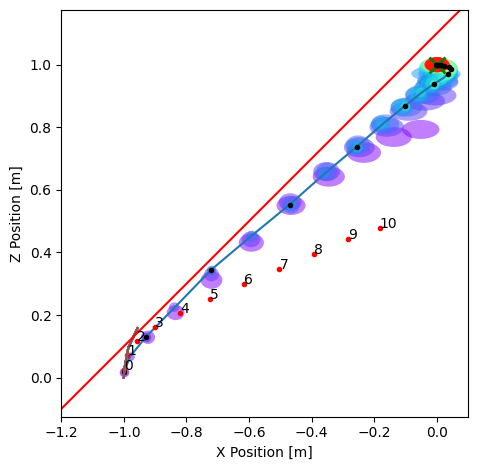

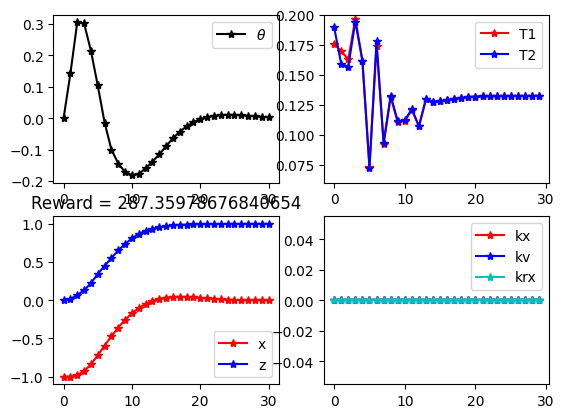

In [13]:
ax = plot_xz_comparison_diag_constraint(prior_run, run, 1, dir=config.image_dir, steps=steps)

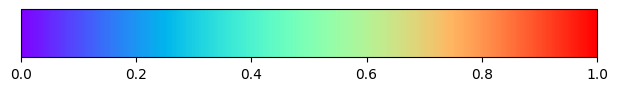

In [8]:
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cb = matplotlib.colorbar.ColorbarBase(ax, orientation='horizontal', cmap='rainbow', alpha=0.9)
plt.savefig("colorbar.png")
# indexes = np.linspace(0,30,30)
# # indexes = -1 + 2*indexes/indexes[-1]
# indexes = indexes/np.max(indexes)
# cc = np.asarray(indexes)
# # cc = np.tan(np.asarray(indexes))
# cmap = matplotlib.cm.get_cmap('rainbow') #('CMRmap')